# What is Machine Learning?
It is the best!

## For many problems, it’s difficult to program the correct behavior by hand
- recognising people and objects
- understanding human speech
- predictive text
- spam filtering

## Machine learning approach:
Machine learning (ML) is a subset of artificial intelligence (AI) that enables computers to learn from data and make decisions or predictions without being explicitly programmed to perform the task

## Why might you want to use a learning algorithm?
-  hard to code up a solution by hand (e.g. vision, speech)
-  system needs to adapt to a changing environment (e.g. spam detection)
- want the system to perform better than the human programmers
- privacy/fairness (e.g. ranking search results)


## Types of Machine Learning

- Supervised Machine Learning: have labelled examples of the correct behaviour
- Reinforcement Learning: Learning system (agent) interacts with the world and learns to maximise a scalar reward signal
- Unsupervised Learning: no labelled examples -- instead the algorithm just looks for patterns in the data

## An Example of a Task that Requires Machine Learning


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

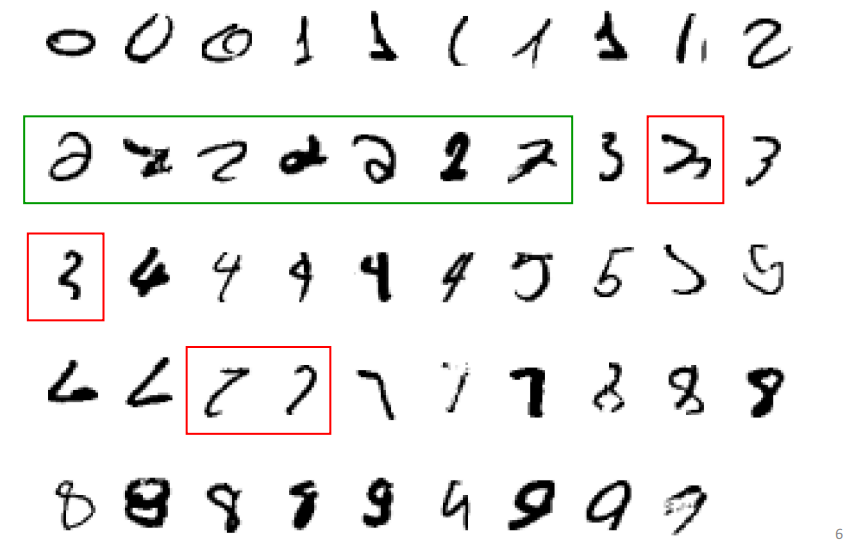

# Classification vs Regression Models

### Regression models predict continuous values. This means they estimate a number within a range.

Examples: Predicting house prices, forecasting sales, or estimating the temperature.
Output: Continuous value


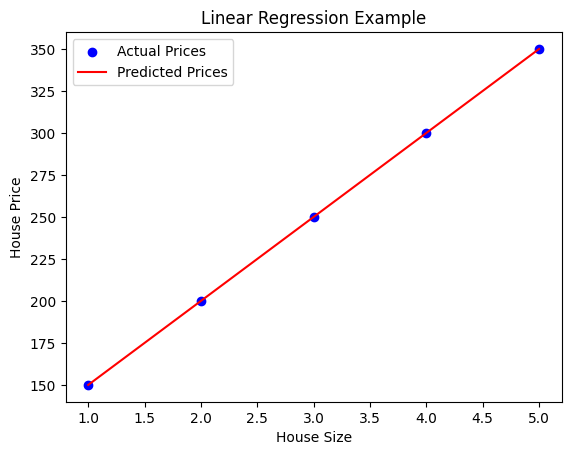

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # House sizes
y = np.array([150, 200, 250, 300, 350])      # House prices

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', label='Predicted Prices')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


### Classification models predict categorical values. This means they assign data into distinct classes or categories.

Examples: Determining if an email is spam or not, classifying images of animals, or diagnosing diseases.

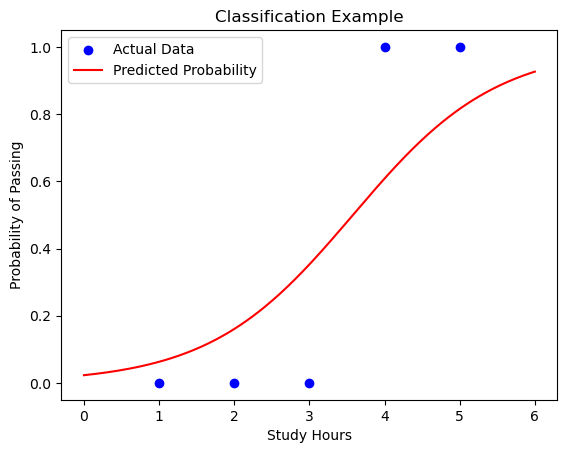

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Study hours
y = np.array([0, 0, 0, 1, 1])                # Pass (1) or Fail (0)

# Create and train the model
model = LogisticRegression()
model.fit(X, y)

# Predictions
X_test = np.linspace(0, 6, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_prob, color='red', label='Predicted Probability')
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Classification Example')
plt.legend()
plt.show()


## Where do we start?

- Machine learning is about learning some properties of a data set and then testing those properties against another data set.

- A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties.
- We call the other set the **testing set** on which we test the learned properties

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas `DataFrame` using the [Seaborn](http://seaborn.pydata.org/) library, and take a look at the first few items:

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as `n_features`.

C:\Users\hjbec\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


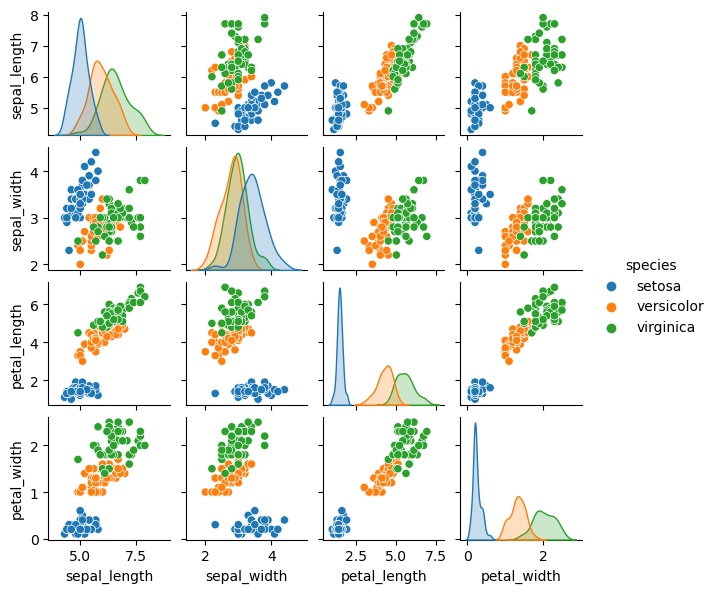

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

We need to decide on two important things here:
- The target array (y), which is the category we want to predict. Let's say in this case it is the species.
- We will predict the species based on the feature matrix (x), which is a matrix made up of petal_length, petal_width, sepai_length, and sepai_width).
- There are 150 samples in the Iris dataset. What do you think the shape of the feature matrix is?

In [ ]:
# Let's create the feature matrix, it is everything except the species, since that's the y axis, so let's get rid of it

X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
# and the target array is just the species, so let's grab that

y_iris = iris['species']
y_iris.shape

(150,)

### Basics of Scikit-Learn

Most commonly, the steps in using the Scikit-Learn are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the `fit` method of the model instance.
5. Apply the model to new data:
   - For supervised learning, often we predict labels for unknown data using the `predict` method.
   - For unsupervised learning, we often transform or infer properties of the data using the `transform` or `predict` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods. This afternoon, you will be able to code your own machine learning project using the data we provide.

Step1: Choose your Class of Model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [ ]:
from sklearn.linear_model import LinearRegression

Step2: Choose the Model Hyperparametres

- ** What are Hyperparameters?**
    - Hyperparameters are settings that control the learning process of a machine learning model.
    - They are set before the training starts and are not learned from the data.
- **Examples of Hyperparameters:**
    - Learning Rate: This controls how much the model adjusts its parameters with each step during training.
    - Number of Trees in a Random Forest: This determines how many decision trees the model will use.
    - Number of Neurons in a Neural Network Layer: This sets how many neurons are in each layer of the network.
- **Why are Hyperparameters Important?**
    - Choosing the right hyperparameters can make a big difference in how well the model performs.
    - It’s like tuning a car engine; the right settings can make the car run smoothly and efficiently.
- **How to Find the Best Hyperparameters?**
Often, you try different settings and see which ones work best. This process is called hyperparameter tuning. I will cover hyperparameter tuning later in this lesson.

Since we are using a linear regression model, we have to worry about very few hyperparametres compared to more complex algorithms.

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Step 3: Arrange our Data

Let's create a little dataset using random numbers for this example

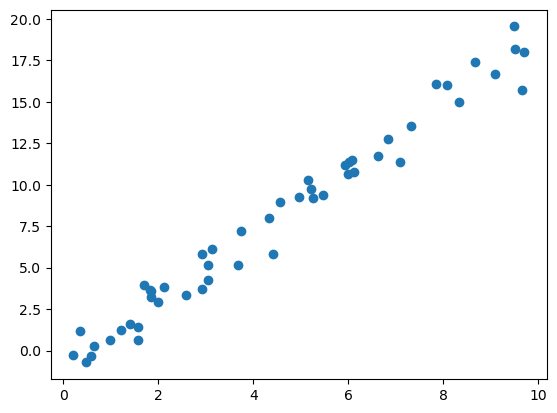

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
X = x[:, np.newaxis]
plt.scatter(x, y);

Step5: Let's fit that to our model

In [ ]:
model.fit(X, y)

LinearRegression()

Step6: Predict labels for unknown data

So now we've trained our model on the randomly generated data. Let's try and use it to predict labels. Let's create a new feature matrix, this time without any y labels:

In [ ]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]

In [ ]:
# Now we can use the predict method

yfit = model.predict(Xfit)

yfit is an array of labels that we predicted for our new feature matrix
let's visualize the results by plotting first the raw data, and then this model fit

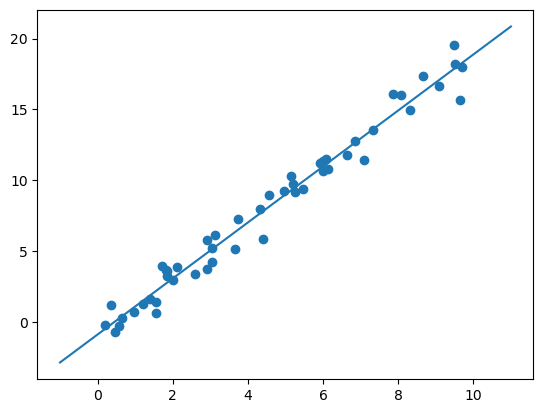

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Now that we know the steps, let's try them for some real data

Let's use the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use a simple generative model known as *Gaussian naive Bayes*, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution.

Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.



Remember what we said about needing a training set and a testing set? Scikit-Learn has got us covered there. It has a method built in to randomly sample a test set from the full set:

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Now we can follow the steps outlined above:

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
# 2. We don't need to choose any hyperparameters
# 3. We already arranged our data into a feature matrix and target vector
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

So how well does this model classify the Irises? Luckily we already have all the original labels for the test set, so we can see how well the model performed by using the accuracy_score method.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Other Models

### Classification Models
- **Logistic Regression:** Used for binary classification problems.
- **K-Nearest Neighbors (KNN):** Classifies data points based on the majority class of their nearest neighbors.
- **Support Vector Machines (SVM):** Finds the hyperplane that best separates classes in the feature space.
- **Decision Trees:** Splits data into branches to make predictions.
- **Random Forest:** An ensemble of decision trees to improve accuracy.
- **Naive Bayes:** Based on Bayes theorem, suitable for text classification.

### Clustering Models
- **K-Means:** Partitions data into K clusters based on feature similarity.
- **Hierarchical Clustering:** Builds a hierarchy of clusters.
- **DBSCAN:** Density-based clustering that can find arbitrarily shaped clusters.

### Dimensionality Reduction
- **Principal Component Analysis (PCA):** Reduces the dimensionality of data while preserving variance.
- **Linear Discriminant Analysis (LDA):** Reduces dimensions while maintaining class separability.

### Ensemble Methods
- **Gradient Boosting:** Builds models sequentially to correct errors of previous models.
- **AdaBoost:** Combines multiple weak classifiers to create a strong classifier.

### Neural Networks
- **MLPClassifier and MLPRegressor:** Multi-layer perceptron models for classification and regression

## Choosing the Best Machine Learning Model:

### Understand the Problem:
- **Type of Problem**: Classification? Regression? Clustering? Something else?
- **Objective**: Define the goal, is it predicting a category, estimating the value, identifying patterns?

### Eplore the Data:

- **Data Characteristics:** Analyze the size, quality, and type of data (numerical, categorical, text, images).
- **Data Preprocessing:** Handle missing values, outliers, and normalize or standardize the data if necessary.

### Selecting a Model

- **Performance:** Evaluate models based on accuracy, precision, recall, F1 score for classification, or mean squared error (MSE) for regression1.
- **Complexity:** Consider the complexity of the model. Simpler models are easier to interpret and often perform well on smaller datasets.
- **Training Time:** Assess how long it takes to train the model, especially with large datasets.

### Experiment with Multiple Models

- **Baseline Model:** Start with a simple model like linear regression or logistic regression to set a baseline.
- **Try Different Algorithms:** Experiment with various models such as decision trees, random forests, support vector machines (SVM), and neural networks.
- **Hyperparameter Tuning:** Optimize model performance by tuning hyperparameters using techniques like grid search or random search.

### Cross-validation

- Use cross-validation to assess model performance on different subsets of data, ensuring the model generalises well to unseen data

### Evaluate and Compare

- Compare models using relevant metrics
- Visualise to understand model performance.

### Select the Best Model

- **Balance:** Choose a model that balances performance, complexity and interpretability.

## Hyperparameter Tuning

###Common Hyperparameters in Regression Models

- **Linear Regression:**
    - Regularization Strength: For Ridge (L2) and Lasso (L1) regression, the regularization parameter (alpha) controls the trade-off between fitting the training data and keeping the model coefficients small.
- **Decision Trees and Random Forests:**
    - Max Depth: The maximum depth of the tree.
    - Min Samples Split: The minimum number of samples required to split an internal node.
- **Number of Estimators:** For Random Forests, the number of trees in the forest.
- **Support Vector Regression (SVR):**
    - C: Regularization parameter.
    - Epsilon: Specifies the epsilon-tube within which no penalty is associated in the training loss function.
    - Kernel: Type of kernel to be used (e.g., linear, polynomial, RBF).




### Hyperparameter Tuning Techniques

- **Grid Search**: Exhaustively searches over a specified parameter grid. It is a brute force search.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

- **Random Search:**  Samples a given number of candidates from a parameter space with a specified distribution.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(1, 20, 1)}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


### Hyperparameter Tuning Example: Using a SVR Model and a Gridsearch

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define the model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

## Key Hyperparameters

- **Epsilon (ϵ):** Defines a margin of tolerance where no penalty is given to errors.
- **C (Regularisation Parameter):** Controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
- **Kernel:** Transforms the input data into a higher-dimensional space to make it possible to perform linear separation in that space. Common kernels include 'linear', 'poly', and 'rbf'.

In [8]:
# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best score: 0.037023452240845765


 After evaluating all the combinations, GridSearchCV identifies the combination of hyperparameters that results in the best performance according to the specified scoring metric (e.g., negative mean squared error in this case).

In [9]:
# Extract the best model
best_model = grid_search.best_estimator_

 The best_estimator_ attribute of the GridSearchCV object holds the model that was trained with the best combination of hyperparameters. By assigning ``grid_search.best_estimator_`` to ``best_model``, you are extracting this best-performing model.

In [10]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test set Mean Squared Error:", mean_squared_error(y_test, y_pred))

Test set Mean Squared Error: 0.04049153537249439


## Overfitting and Underfitting

Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise and random fluctuations. This means the model performs exceptionally well on the training data but poorly on new, unseen data because it has essentially “memorized” the training data rather than generalising from it.

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load dataset
iris = load_iris()
X = iris.data[:, 0].reshape(-1, 1)  # Use only one feature for simplicity and to demonstrate overfitting
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fit a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)
print("Linear Model Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Linear Model Test MSE:", mean_squared_error(y_test, y_pred_test))

Linear Model Train MSE: 0.2741915079572271
Linear Model Test MSE: 0.1979546681395589


In [14]:
# Create polynomial features
poly = PolynomialFeatures(degree=10)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict and evaluate
y_poly_pred_train = poly_model.predict(X_poly_train)
y_poly_pred_test = poly_model.predict(X_poly_test)
print("Polynomial Model Train MSE:", mean_squared_error(y_train, y_poly_pred_train))
print("Polynomial Model Test MSE:", mean_squared_error(y_test, y_poly_pred_test))

Polynomial Model Train MSE: 0.22778617199727352
Polynomial Model Test MSE: 0.2036438124548538


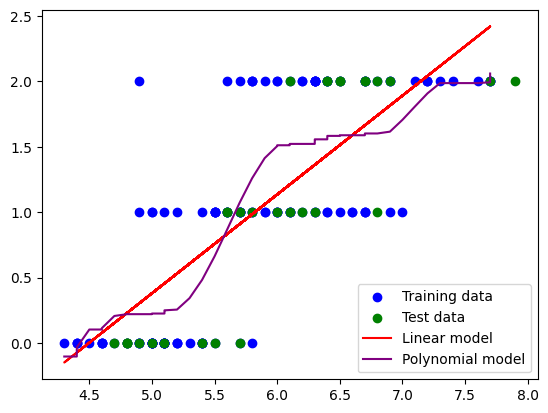

In [15]:
# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, y_pred_train, color='red', label='Linear model')
plt.plot(np.sort(X_train, axis=0), np.sort(y_poly_pred_train, axis=0), color='purple', label='Polynomial model')
plt.legend()
plt.show()

### How do we prevent overfitting?

- Cross-Validation
- More Data
- Remove Irrelevant Features - perform feature selection
- Apply Regularisation Techniques
- Early Stopping: Monitor the performance and stop when the performance starst to degrade
- Combine Methods to Improve Generalisation
- Use simpler methods

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the SVM model
svm_model = SVC(kernel='linear', C=1)

In [18]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.         0.95833333 0.875      1.         0.95833333]
Mean cross-validation score: 0.9583333333333334


In [19]:
# Train the model on the entire training set
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 1.0
